<a href="https://colab.research.google.com/github/Gabriellemga/Machine_learning/blob/main/Classifica%C3%A7%C3%A3o_otimizando_modelos/Classifica%C3%A7%C3%A3o_otimizando_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação: otimizando modelos de machine learning

# Conhecendo os dados

* 'receita_cliente': Renda do cliente em R$


* 'anuidade_emprestimo': Valor anual da taxa de juros do empréstimo em $


* 'anos_casa_propria': Idade da propriedade do cliente em anos


* 'telefone_trab': Acessibilidade do número de telefone comercial (1 indica Sim e 0 indica Não)


* 'avaliacao_cidade': Classificação da cidade do cliente: 3 para excelente, 2 para bom e 1 para médio.


* 'score_1': Pontuação originada de uma fonte externa. Este é um escore normalizado.


* 'score_2': Pontuação originada de uma fonte externa. Este é um escore normalizado.


* 'score_3': Pontuação originada de uma fonte externa. Este é um escore normalizado.


* 'score_social': Quantidade de amigos/familiares do cliente que não cumpriram com pagamentos de empréstimos nos últimos 60 dias.


* 'troca_telefone': Quantidade de dias antes do pedido de empréstimo em que o cliente mudou seu número de telefone.


* 'inadimplente': 1 indica que o cliente não honrou com o pagamento do empréstimo, e 0 indica o contrário.

In [3]:
import pandas as pd

In [4]:
dados = pd.read_csv('/content/dados_inadimplencia.csv')

In [5]:
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,16855.246324,2997.000000,12.157324,0,2.0,0.501213,0.003109,0.513171,0.117428,243.0,1
1,13500.000000,2776.050000,12.157324,0,2.0,0.501213,0.269730,0.513171,0.097900,617.0,0
2,11250.000000,2722.188351,12.157324,0,3.0,0.701396,0.518625,0.700184,0.118600,9.0,0
3,27000.000000,6750.000000,3.000000,0,2.0,0.501213,0.649571,0.513171,0.047400,300.0,0
4,22500.000000,3097.800000,12.157324,0,2.0,0.440744,0.509677,0.513171,0.014400,2913.0,1


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   receita_cliente      14578 non-null  float64
 1   anuidade_emprestimo  14578 non-null  float64
 2   anos_casa_propria    14578 non-null  float64
 3   telefone_trab        14578 non-null  int64  
 4   avaliacao_cidade     14578 non-null  float64
 5   score_1              14578 non-null  float64
 6   score_2              14578 non-null  float64
 7   score_3              14578 non-null  float64
 8   score_social         14578 non-null  float64
 9   troca_telefone       14578 non-null  float64
 10  inadimplente         14578 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.2 MB


In [11]:
dados['inadimplente'].value_counts(normalize=True) * 100

,proportion
inadimplente,
0,67.649883
1,32.350117


In [12]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']

In [13]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.33, random_state=RANDOM_STATE, stratify=y)

## Construindo os modelos

### Treinando o DecisionTreeClassifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
modelo_dt = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_STATE)
modelo_dt.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [18]:
from sklearn.metrics import recall_score

recall_dt = recall_score(y_teste, modelo_dt.predict(x_teste))
print(f'Recall dt: {recall_dt:.3f}')

Recall dt: 0.143


### Treinando o LogisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [20]:
logistic_piperline = make_pipeline(StandardScaler(), LogisticRegression(random_state=RANDOM_STATE))
logistic_piperline.fit(x_treino, y_treino)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [21]:
from sklearn.metrics import recall_score

recall_lr = recall_score(y_teste, logistic_piperline.predict(x_teste))
print(f'Recall lr: {recall_lr:.3f}')

Recall lr: 0.253


## Realizando a busca em grade

### Decision Tree Classifier

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
import numpy as np

param_grid_dt = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': np.linspace(6, 12, 4, dtype=int),
    'min_samples_split': np.linspace(5, 20, 4, dtype=int),
    'min_samples_leaf': np.linspace(5, 20, 4, dtype=int),
    'max_features': ['sqrt', 'log2'],
    'splitter': ['best', 'random']
}

In [24]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

dt_grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state=RANDOM_STATE),
                              param_grid = param_grid_dt,
                              scoring = "recall",
                              n_jobs = -1,
                              cv = cv)

dt_grid_search.fit(x_treino, y_treino)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 6,  8, 10, 12]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([ 5, 10, 15, 20]),
                         'min_samples_split': array([ 5, 10, 15, 20]),
                         'splitter': ['best', 'random']},
             scoring='recall')

### Obtendo informações da busca em grade

In [27]:
dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': np.int64(12),
 'max_features': 'sqrt',
 'min_samples_leaf': np.int64(15),
 'min_samples_split': np.int64(5),
 'splitter': 'best'}

In [33]:
df_cv_results_dt = pd.DataFrame(dt_grid_search.cv_results_)
df_cv_results_dt.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026296,0.008984,0.008126,0.001363,gini,6,sqrt,5,5,best,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.213608,0.145570,0.205696,0.164557,0.200949,0.186076,0.026336,251
1,0.008998,0.000303,0.007670,0.000448,gini,6,sqrt,5,5,random,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.193038,0.132911,0.132911,0.112342,0.161392,0.146519,0.028013,493
2,0.020158,0.001431,0.007199,0.000405,gini,6,sqrt,5,10,best,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.213608,0.145570,0.205696,0.164557,0.200949,0.186076,0.026336,251


In [34]:
df_cv_results_dt.loc[[dt_grid_search.best_index_]]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
208,0.033726,0.002106,0.008517,0.001742,gini,12,sqrt,15,5,best,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",0.242089,0.324367,0.272152,0.245253,0.232595,0.263291,0.033244,1


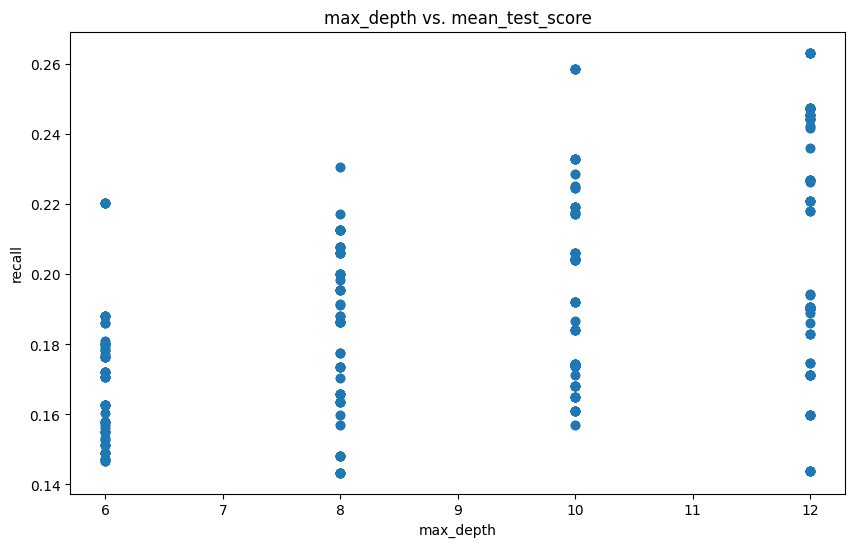

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    df_cv_results_dt['param_max_depth'],
    df_cv_results_dt['mean_test_score'],
    )

plt.title('max_depth vs. mean_test_score')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.show()

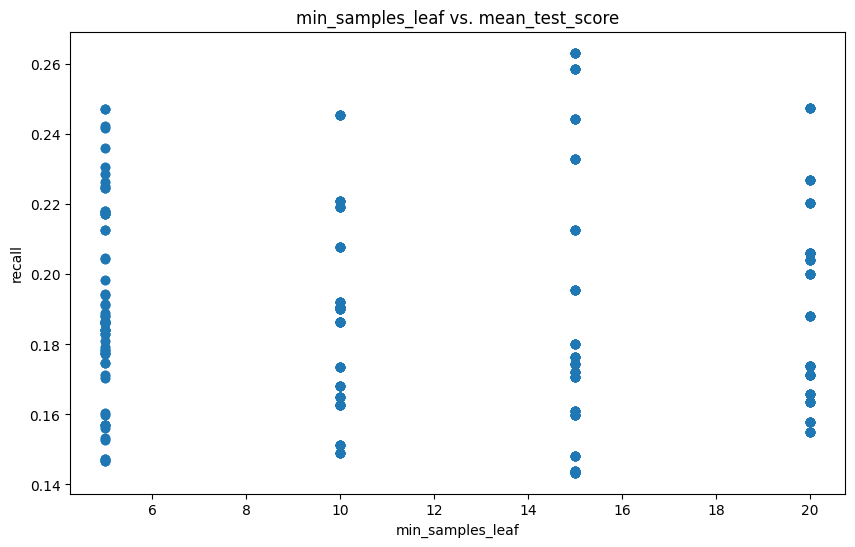

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_cv_results_dt['param_min_samples_leaf'],
    df_cv_results_dt['mean_test_score'],
    )

plt.title('min_samples_leaf vs. mean_test_score')
plt.xlabel('min_samples_leaf')
plt.ylabel('recall')
plt.show()

## Busca em grade para o LogisticRegression

In [37]:
max_iter = np.linspace(100, 300, 5, dtype=int)
c = [0.001, 0.01, 0.1, 1, 10]

param_grid_lr = [
    {'logisticregression__solver' : ['newton-cg', 'lbfgs'],
      'logisticregression__penalty' : ['l2'],
      'logisticregression__max_iter' : max_iter,
       'logisticregression__C' : c},
    {'logisticregression__solver' : ['liblinear'],
      'logisticregression__penalty' : ['l1', 'l2'],
      'logisticregression__max_iter' : max_iter,
      'logisticregression__C' : c},
]

In [40]:
lr_grid_search = GridSearchCV(estimator = make_pipeline(StandardScaler(), LogisticRegression()),
                              param_grid = param_grid_lr,
                              scoring = "recall",
                              n_jobs = -1,
                              cv = cv)

lr_grid_search.fit(x_treino, y_treino)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
                          'logisticregression__max_iter': array([100, 150, 200, 250, 300]),
                          'logisticregression__penalty': ['l2'],
                          'logisticregression__solver': ['newton-cg', 'lbfgs']},
                         {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
                          'logisticregression__max_iter': array([100, 150, 200, 250, 300]),
                          'logisticregression__penalty': ['l1', 'l2'],
                          'logisticregression__solver': ['liblinear']}],
             scoring='recall')

In [41]:
lr_grid_search.best_params_

{'logisticregression__C': 0.001,
 'logisticregression__max_iter': np.int64(100),
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [42]:
df_cv_results_lr = pd.DataFrame(lr_grid_search.cv_results_)
df_cv_results_lr.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__penalty,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030538,0.005115,0.009235,0.001021,0.001,100,l2,newton-cg,"{'logisticregression__C': 0.001, 'logisticregr...",0.102848,0.101266,0.115506,0.088608,0.079114,0.097468,0.012523,86
1,0.017561,0.001331,0.009656,0.001979,0.001,100,l2,lbfgs,"{'logisticregression__C': 0.001, 'logisticregr...",0.102848,0.101266,0.113924,0.087025,0.079114,0.096835,0.012313,91
2,0.027215,0.001700,0.009964,0.000841,0.001,150,l2,newton-cg,"{'logisticregression__C': 0.001, 'logisticregr...",0.102848,0.101266,0.115506,0.088608,0.079114,0.097468,0.012523,86
3,0.017604,0.001849,0.009641,0.001332,0.001,150,l2,lbfgs,"{'logisticregression__C': 0.001, 'logisticregr...",0.102848,0.101266,0.113924,0.087025,0.079114,0.096835,0.012313,91
4,0.025407,0.000928,0.009500,0.001184,0.001,200,l2,newton-cg,"{'logisticregression__C': 0.001, 'logisticregr...",0.102848,0.101266,0.115506,0.088608,0.079114,0.097468,0.012523,86


In [43]:
df_cv_results_lr.loc[[lr_grid_search.best_index_]]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__penalty,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
51,0.028082,0.010739,0.009806,0.003266,0.001,100,l2,liblinear,"{'logisticregression__C': 0.001, 'logisticregr...",0.251582,0.254747,0.265823,0.248418,0.235759,0.251266,0.009723,1


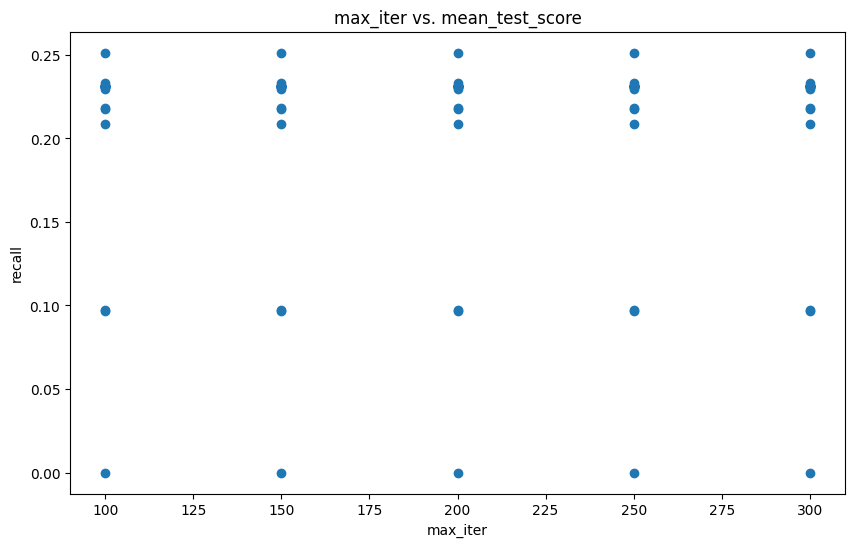

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_cv_results_lr['param_logisticregression__max_iter'],
    df_cv_results_lr['mean_test_score'],
    )

plt.title('max_iter vs. mean_test_score')
plt.xlabel('max_iter')
plt.ylabel('recall')
plt.show()

## Validação cruzada aninhada

### Decision Tree Classifier

In [45]:
inner_cv = StratifiedKFold(shuffle=True, random_state=RANDOM_STATE)

outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

In [46]:
from sklearn.model_selection import cross_val_score

dt_nested_gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state=RANDOM_STATE),
                                         param_grid = param_grid_dt,
                                         scoring = "recall",
                                         n_jobs = -1,
                                         cv = inner_cv
                                         )

dt_nested_scores = cross_val_score(dt_nested_gs, x_treino, y_treino, cv=outer_cv)

print(f'resultado de cada iteração do cv externo: {dt_nested_scores}')
print(f'média: {dt_nested_scores.mean()}')

resultado de cada iteração do cv externo: [0.23646724 0.24762808 0.20512821]
média: 0.2297411750289676


### LogisticRegression

In [47]:
max_iter = np.linspace(100, 300, 5, dtype=int)
c = [0.001, 0.01, 0.1, 1, 10]

param_grid_lr = [
    {'logisticregression__solver' : ['newton-cg', 'lbfgs'],
      'logisticregression__penalty' : ['l2'],
      'logisticregression__max_iter' : max_iter,
       'logisticregression__C' : c},
    {'logisticregression__solver' : ['liblinear'],
      'logisticregression__penalty' : ['l1', 'l2'],
      'logisticregression__max_iter' : max_iter,
      'logisticregression__C' : c},
]

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

lr_nested_gs = GridSearchCV(estimator = make_pipeline(StandardScaler(), LogisticRegression()),
                               param_grid = param_grid_lr,
                               scoring = "recall",
                               n_jobs = -1,
                               cv = inner_cv)

lr_nested_scores = cross_val_score(lr_nested_gs, x_treino, y_treino, cv=outer_cv)

In [48]:
print("Métricas de desempenho para cada iteração do CV externo:", lr_nested_scores)
print(f"Média das métricas de desempenho do CV externo: {lr_nested_scores.mean():.4f}") # melhorar esse texto para se referenciar somente a métrica recall

lr_nested_gs.fit(x_treino, y_treino)
best_params = lr_nested_gs.best_params_
print("Melhores hiperparâmetros:", best_params)

Métricas de desempenho para cada iteração do CV externo: [0.24691358 0.27703985 0.2374169 ]
Média das métricas de desempenho do CV externo: 0.2538
Melhores hiperparâmetros: {'logisticregression__C': 0.001, 'logisticregression__max_iter': np.int64(100), 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}


## Busca aleatória

### Decision Tree Classifier

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
rs_dt = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
            param_distributions=param_grid_dt,
            n_iter=100,
            scoring='recall',
            n_jobs=-1,
            cv=inner_cv,
            random_state=RANDOM_STATE)

rs_dt_nested_scores = cross_val_score(rs_dt, x_treino, y_treino, cv=outer_cv)

In [53]:
print(f'resultado de cada iteração do cv externo: {rs_dt_nested_scores}')
print(f'média: {rs_dt_nested_scores.mean()}')

resultado de cada iteração do cv externo: [0.23646724 0.18975332 0.21272555]
média: 0.21298203440307595


In [54]:
rs_dt.fit(x_treino, y_treino)
rs_dt.best_params_

{'splitter': 'best',
 'min_samples_split': np.int64(5),
 'min_samples_leaf': np.int64(15),
 'max_features': 'sqrt',
 'max_depth': np.int64(12),
 'criterion': 'gini'}

### LogisticRegression

In [56]:
rs_lr = RandomizedSearchCV(estimator=make_pipeline(StandardScaler(), LogisticRegression()),
            param_distributions=param_grid_lr,
            n_iter=50,
            scoring='recall',
            n_jobs=-1,
            cv=inner_cv,
            random_state=RANDOM_STATE)

rs_lr_nested_scores = cross_val_score(rs_lr, x_treino, y_treino, cv=outer_cv)

print(f'resultado de cada iteração do cv externo: {rs_lr_nested_scores}')
print(f'média: {rs_lr_nested_scores.mean()}')

resultado de cada iteração do cv externo: [0.24691358 0.27703985 0.2374169 ]
média: 0.2537901108426093


In [57]:
rs_lr.fit(x_treino, y_treino)
rs_lr.best_params_

{'logisticregression__solver': 'liblinear',
 'logisticregression__penalty': 'l2',
 'logisticregression__max_iter': np.int64(150),
 'logisticregression__C': 0.001}

## Otimização bayesiana

### Decision Tree Classifier

In [58]:
! pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.1 MB/s eta 0:00:00


In [59]:
from skopt.space import Real, Integer, Categorical

space_dt = {
    'criterion': Categorical(['gini', 'entropy']),
    'max_depth': Integer(6, 12),
    'min_samples_split': Integer(5, 20),
    'min_samples_leaf': Integer(5, 20),
    'max_features': Categorical(['sqrt', 'log2']),
    'splitter': Categorical(['best', 'random'])
}

In [60]:
from skopt import BayesSearchCV

In [61]:
opt_dt = BayesSearchCV(estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
                    search_spaces = space_dt,
                    n_iter=50,
                    scoring='recall',
                    n_jobs=-1,
                    cv=inner_cv,
                    random_state=RANDOM_STATE)

bs_dt_nested_scores = cross_val_score(opt_dt, x_treino, y_treino, cv=outer_cv)

/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('gini'), np.int64(11), np.str_('log2'), np.int64(20), np.int64(5), np.str_('best')] before, using random point ['entropy', np.int64(11), 'log2', np.int64(16), np.int64(16), 'best']
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('entropy'), np.int64(12), np.str_('log2'), np.int64(20), np.int64(5), np.str_('best')] before, using random point ['gini', np.int64(6), 'log2', np.int64(8), np.int64(15), 'best']
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('gini'), np.int64(12), np.str_('log2'), np.int64(20), np.int64(5), np.str_('best')] before, using random point ['entropy', np.int64(11), 'log2', np.int64(16), np.int64(17), 'best']
  warnings.

In [62]:
print(f'resultado de cada iteração do cv externo: {bs_dt_nested_scores}')
print(f'resultado de cada iteração do cv externo: {rs_lr_nested_scores}')

resultado de cada iteração do cv externo: [0.23931624 0.31973435 0.21272555]
resultado de cada iteração do cv externo: [0.24691358 0.27703985 0.2374169 ]


In [63]:
opt_dt.fit(x_treino, y_treino)
opt_dt.best_params_

OrderedDict([('criterion', 'gini'),
             ('max_depth', 12),
             ('max_features', 'log2'),
             ('min_samples_leaf', 15),
             ('min_samples_split', 5),
             ('splitter', 'best')])

##  LogisticRegression

In [75]:
max_iter = Integer(100, 300)
c = Categorical([0.001, 0.01, 0.1, 1, 10])

space_lr = [
    {
        'logisticregression__solver': Categorical(['newton-cg', 'lbfgs']),
        'logisticregression__penalty': Categorical(['l2']),
        'logisticregression__max_iter': max_iter,
        'logisticregression__C': c
    },
    {
        'logisticregression__solver': Categorical(['liblinear']),
        'logisticregression__penalty': Categorical(['l1', 'l2']),
        'logisticregression__max_iter': max_iter,
        'logisticregression__C': c
    },
]

In [76]:
opt_lr = BayesSearchCV(estimator=make_pipeline(StandardScaler(), LogisticRegression()),
            search_spaces = space_lr,
            n_iter=50,
            scoring='recall',
            n_jobs=-1,
            cv=inner_cv,
            random_state=RANDOM_STATE)

optr_lr_nested_scores = cross_val_score(opt_lr, x_treino, y_treino, cv=outer_cv)

/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(10), np.int64(134), np.str_('l2'), np.str_('lbfgs')] before, using random point [0.001, np.int64(217), 'l2', 'lbfgs']
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(10), np.int64(134), np.str_('l2'), np.str_('lbfgs')] before, using random point [0.001, np.int64(217), 'l2', 'lbfgs']
  warnings.warn(


In [79]:
print(f'resultado de cada iteração do cv externo: {optr_lr_nested_scores}')
print(f'média: {optr_lr_nested_scores.mean()}')

resultado de cada iteração do cv externo: [0.24691358 0.27703985 0.2374169 ]
média: 0.2537901108426093


In [ ]:
opt_lr.fit(x_treino, y_treino)
opt_lr.best_params_

/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(10), np.int64(134), np.str_('l2'), np.str_('lbfgs')] before, using random point [0.001, np.int64(217), 'l2', 'lbfgs']
  warnings.warn(


In [81]:
opt_lr.predict(x_teste)

array([0, 1, 0, ..., 0, 0, 0])